# 線形分類問題　One-Hot2値分類

## データセットの作成

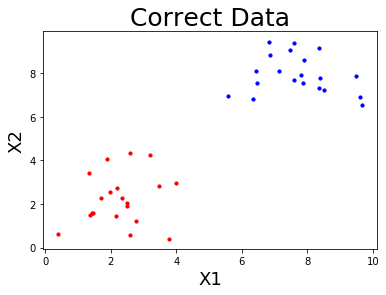

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#色の定義
colors=("red","blue","lightgreen","gray","cyan")

#X(入力データ)の作成
#↓サンプル数
num_of_sam = 20
#↓ガウシアンノイズの広がり具合
std_dv = 1
#↓2つのデータ群の中心点を生成
group1 = np.array([2.5,2.5])
group2 = np.array([7.5,7.5])
#↓2つのデータ群にノイズ(平均0，分散1)を足し合わせる
group1 = group1+np.random.randn(num_of_sam,2)*std_dv
group2 = group2+np.random.randn(num_of_sam,2)*std_dv
#↓2つのグループを縦方向に連結しXとする
X = np.vstack((group1,group2))

#T(正解データ)の作成
#↓グループ1の正解データを[0,1]とする
t_group1 = np.tile(0,(num_of_sam))
#↓グループ2の正解データを[1,0]とする
t_group2 = np.tile(1,(num_of_sam))
#↓2つのグループを横方向に連結し1次元の正解データを作成
T_vector = np.hstack((t_group1,t_group2))
#↓one-hot表現の正解データを作成
T = np.eye(len(np.unique(T_vector)))[T_vector]

#↓でone-hot表現からクラスの整数値に変換可
#T_vector = np.argmax(T,axis=1)

#プロットを行う
#↓X,Tをもとに色付きの点をプロットする
for i in np.unique(T_vector):
    plt.scatter(x=X[T_vector==i,0],y=X[T_vector==i,1],s=10,c=colors[i])
plt.title("Correct Data",fontsize=25)
plt.xlabel("X1",fontsize=18)
plt.ylabel("X2",fontsize=18)
plt.show()

In [3]:
#ソフトマックス関数の作成
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

#クロスエントロピー誤差の関数を作成
def cross_entropy(Y,T):
    return -np.sum(T*np.log(Y+1e-7))

#重みを生成(初期値を平均0，分散1の乱数で生成)
W = np.random.randn(2,2)
#バイアスを生成(初期値を平均0，分散1の乱数で生成)
B = np.random.randn(1,2)
#学習率の設定
eta = 0.001
#イテレーション数の設定
iteration = 10000
#損失の推移保存リスト
E_save = np.array([])

#学習
for i in range(iteration):
    
    #--順伝番 Forward propagation--
    #↓出力の計算
    Y = softmax(np.dot(X,W)+B)
    
    
    #--逆伝番 Backward propagation--
    #↓損失の計算(クロスエントロピー誤差を用いる)
    E = cross_entropy(Y,T)
    #損失の保存
    E_save = np.append(E_save,E)
    #↓EをWで偏微分する
    dW = X.T.dot(Y-T)
    #↓EをBで偏微分する
    dB = np.sum(Y-T,axis=0,keepdims=True)
    #↓重みの更新
    W = W-eta*dW
    #↓バイアスの更新
    B = B-eta*dB

print("重みw11の値は{0:.2f}".format(W[0,0]))
print("重みw12の値は{0:.2f}".format(W[0,1]))
print("重みw21の値は{0:.2f}".format(W[1,0]))
print("重みw22の値は{0:.2f}".format(W[1,1]))
print("バイアスb1の値は{0:.2f}".format(B[0,0]))
print("バイアスb2の値は{0:.2f}".format(B[0,1]))

重みw11の値は-0.10
重みw12の値は1.00
重みw21の値は-0.28
重みw22の値は0.74
バイアスb1の値は4.51
バイアスb2の値は-5.88


## 学習結果のプロット

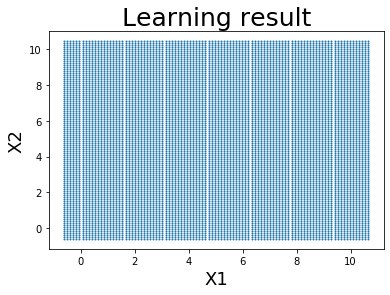

In [4]:
#グリッドの最小値と最大値の決定
#↓x1のmin値-1とmax値+1を保存する
x1_min = X[:,0].min()-1
x1_max = X[:,0].max()+1
#↓x2のmin値-1とmax値+1を保存する
x2_min = X[:,1].min()-1
x2_max = X[:,1].max()+1

#グリッドの細かさ指定
#↓x1方向に100刻み
x1_grid = np.linspace(x1_min,x1_max,100)
#↓x2方向に100刻み                    
x2_grid = np.linspace(x2_min,x2_max,100)

#グリッドをプロットするためのデータ生成
#↓xxにグリッドのx1データ，yyにグリッドのx2データを保存
xx,yy = np.meshgrid(x1_grid,x2_grid)

#xx,yyを二次配列にまとめる
#↓1列目がx1データ，2列目がx2データとなるようにまとめる
X_grid = np.c_[xx.reshape(-1),yy.reshape(-1)]

#プロットを行う
#↓生成したグリッド(仮)を表示する
plt.scatter(X_grid[:,0],X_grid[:,1],s=1)
plt.title("Learning result",fontsize=25)
plt.xlabel("X1",fontsize=18)
plt.ylabel("X2",fontsize=18)
plt.show()


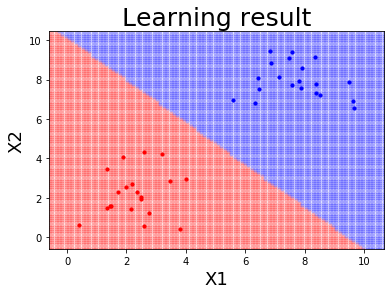

In [6]:
#学習結果を色で表現するためにデータを用意
#↓学習結果のyデータを生成
Y_grid = softmax(np.dot(X_grid, W)+B)

#↓学習結果のyデータを1次元にする
Y_grid_vector = np.argmax(Y_grid,axis=1)

#↓学習結果をone-hot表現にする
Y = np.eye(len(np.unique(T_vector)))[Y_grid_vector]

#プロットを行う
#↓正解データを点でプロット
for i in np.unique(T_vector):
    plt.scatter(x=X[T_vector==i,0],y=X[T_vector==i,1],s=10,c=colors[i])
#↓学習結果をグリッドでプロット
for i in np.unique(T_vector):
    plt.scatter(x=X_grid[Y_grid_vector==i,0],y=X_grid[Y_grid_vector==i,1],s=10,c=colors[i],alpha=0.2)
plt.title("Learning result",fontsize=25)
plt.xlabel("X1",fontsize=18)
plt.ylabel("X2",fontsize=18)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.show()

## 損失推移のプロット

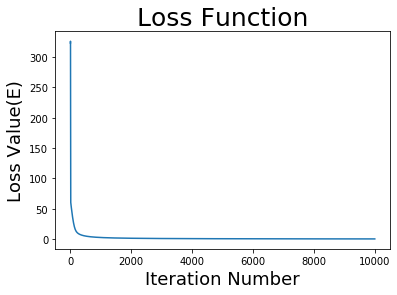

In [7]:
#プロットを行う
#↓損失とイテレーション数の関係を点でプロット
plt.plot(E_save)
plt.title("Loss Function",fontsize=25)
plt.xlabel("Iteration Number",fontsize=18)
plt.ylabel("Loss Value(E)",fontsize=18)
plt.show()